# 1. Import Dependencies

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import mediapipe as mp
import time

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    '''Detect the landmarks of the image using the mediapipe model'''
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    '''Function to draw landmarks from the detected image'''
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    '''Same as draw_landmarks but with different colors and thickness'''
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [42]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed video
        ret, frame = cap.read()

        # Make detections the results will be SolutionOutputs
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks with styled connections
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('Gesture Detected', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
print(f'Length of left hand landmark result: {len(results.left_hand_landmarks.landmark)}')

Length of left hand landmark result: 21


In [8]:
draw_landmarks(frame, results)

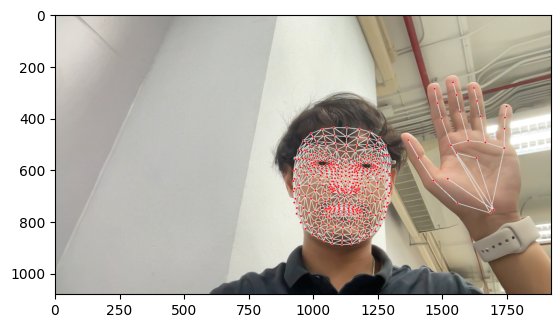

In [9]:
# Check on the image
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3.Extract Keypoint Values

- `pose_landmarks`
A list of pose landmarks. Each landmark consists of the following:
x and y: Landmark coordinates normalized to [0.0, 1.0] by the image width and height respectively.
z: Should be discarded as currently the model is not fully trained to predict depth, but this is something on the roadmap.
visibility: A value in [0.0, 1.0] indicating the likelihood of the landmark being visible (present and not occluded) in the image.

- `face_landmarks`
A list of 468 face landmarks. Each landmark consists of x, y and z. x and y are normalized to [0.0, 1.0] by the image width and height respectively. z represents the landmark depth with the depth at center of the head being the origin, and the smaller the value the closer the landmark is to the camera. The magnitude of z uses roughly the same scale as x.

- `left_hand_landmarks`
A list of 21 hand landmarks on the left hand. Each landmark consists of x, y and z. x and y are normalized to [0.0, 1.0] by the image width and height respectively. z represents the landmark depth with the depth at the wrist being the origin, and the smaller the value the closer the landmark is to the camera. The magnitude of z uses roughly the same scale as x.

- `right_hand_landmarks`
A list of 21 hand landmarks on the right hand, in the same representation as left_hand_landmarks.

In [10]:
print(f'Length of left hand landmark result: {len(results.face_landmarks.landmark)}')

Length of left hand landmark result: 468


In [12]:
# Check for the pose landmarks
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
print(f'Pose: \n{pose}')

Pose: 
[array([ 0.58688843,  0.63779867, -0.78845352,  0.99993664]), array([ 0.60673994,  0.561616  , -0.71028703,  0.99989617]), array([ 0.62064153,  0.56373328, -0.71005875,  0.99991053]), array([ 0.63350463,  0.56621712, -0.70972818,  0.99988949]), array([ 0.55747396,  0.563784  , -0.73090541,  0.99988544]), array([ 0.5380109 ,  0.56767321, -0.72999668,  0.99989456]), array([ 0.52126116,  0.57252687, -0.73012519,  0.99986517]), array([ 0.64869094,  0.60210258, -0.32131585,  0.99989569]), array([ 0.49139577,  0.62154615, -0.40788174,  0.99991304]), array([ 0.61309737,  0.72172004, -0.65084541,  0.9999119 ]), array([ 0.55159599,  0.72197306, -0.67576045,  0.99991679]), array([ 0.77293652,  1.00095177, -0.17791677,  0.99885803]), array([ 0.3847335 ,  1.03100812, -0.22547457,  0.98941106]), array([ 1.0549798 ,  1.2308346 , -0.74595761,  0.92236412]), array([ 0.32835191,  1.64773333, -0.05275983,  0.19201723]), array([ 0.88262284,  0.69909298, -1.37338662,  0.95169967]), array([ 0.310554

In [13]:
# Pose landmarks
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(123)
# Face landmarks
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
# Left hand landmarks
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
# Right hand landmarks
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
# Check for face landmarks result
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
print(f'Face: \n{face}')

Face: 
[ 0.58190709  0.67612028 -0.03174985 ...  0.64889306  0.53497684
  0.02551061]


In [15]:
def extract_keypoints(results):
    '''Extract keypoints from the results and combine them into a single array'''
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)
print('Combined keypoints: \n', result_test)

Combined keypoints: 
 [ 0.58688843  0.63779867 -0.78845352 ...  0.          0.
  0.        ]


The combined array will be [[pose array],
                            [face array],
                            [lh array],
                            [rh array],]

In [17]:
# Total combined keypoints length
print(f'Length of combined keypoints: {len(result_test)}')
print(f'Equal to 33*4 + 468*3 + 21*3 + 21*3 = {33*4 + 468*3 + 21*3 + 21*3}')

Length of combined keypoints: 1662
Equal to 33*4 + 468*3 + 21*3 + 21*3 = 1662


In [29]:
# Test load and save numpy keypoints array
np.save('0', result_test)
print('Saved')
np.load('0.npy')
print('Loaded')
print(f'Loaded numpy array: \n{np.load("0.npy")}')

Saved
Loaded
Loaded numpy array: 
[ 0.50994849  0.36928761 -0.58544749 ...  0.          0.
  0.        ]


# 4. Setup Folders for Collection

In [20]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect 5 classes
actions = np.array(['hello', 'goodbye', 'please','yes','no'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [ ]:
# hello
## 0
## 1
## 2
## ...
## 29
# goodbye
###...
# no

In [65]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [66]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 3, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (50,50), 
                               cv2.FONT_HERSHEY_SIMPLEX, 2, (70, 70, 255), 3, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (50,50), 
                               cv2.FONT_HERSHEY_SIMPLEX, 2, (70, 70, 255), 3, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [67]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [21]:
# Map actions to integers
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
print(f'Label map: {label_map}')

Label map: {'hello': 0, 'goodbye': 1, 'please': 2, 'yes': 3, 'no': 4}


In [23]:
# Map x, y for data and labels
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [24]:
print(f'Shape of sequences: {np.array(sequences).shape}')
print('(total sequences, sequence length, total keypoints)')

Shape of sequences: (150, 30, 1662)
(total sequences, sequence length, total keypoints)


In [25]:
print(f'Label shape: {np.array(labels).shape}')

Label shape: (150,)


In [26]:
X = np.array(sequences)
print(f'X shape: {X.shape}')

X shape: (150, 30, 1662)


In [27]:
# One hot encoding
y = to_categorical(labels).astype(int)
print(f'y shape: {y.shape}')
print(f'Y: \n{y}')

y shape: (150, 5)
Y: 
[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0

In [28]:
# Train Test split with testing size 0.05
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=11)

In [29]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (142, 30, 1662)
X_test shape: (8, 30, 1662)
y_train shape: (142, 5)
y_test shape: (8, 5)


# 7. Build and Train LSTM Neural Network

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [33]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [34]:
# Build model
def lstm_model():
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
    model.add(LSTM(128, return_sequences=True, activation='relu'))
    model.add(LSTM(64, return_sequences=False, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(actions.shape[0], activation='softmax'))
    return model

In [175]:
# Check method to map the probability with the label
# res = [.7, 0.2, 0.1, 0.8, 0.1]
# actions[np.argmax(res)]

### Build model

In [36]:
lstm_model = lstm_model()
lstm_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



In [37]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 596,741
Trainable params: 596,741
Non-trai

### Train model

In [124]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [129]:
lstm_model.fit(X_train, y_train, epochs=30, shuffle=True, callbacks=[tb_callback])

Epoch 1/30
5/5 [==============================] - 18s 3s/step - loss: 2.0285 - categorical_accuracy: 0.1831
Epoch 2/30
5/5 [==============================] - 15s 3s/step - loss: 1.6733 - categorical_accuracy: 0.1831
Epoch 3/30
5/5 [==============================] - 15s 3s/step - loss: 1.6718 - categorical_accuracy: 0.1690
Epoch 4/30
5/5 [==============================] - 17s 3s/step - loss: 1.6461 - categorical_accuracy: 0.2042
Epoch 5/30
5/5 [==============================] - 16s 3s/step - loss: 1.5782 - categorical_accuracy: 0.2324
Epoch 6/30
5/5 [==============================] - 15s 3s/step - loss: 1.5303 - categorical_accuracy: 0.2887
Epoch 7/30
5/5 [==============================] - 15s 3s/step - loss: 1.5366 - categorical_accuracy: 0.3239
Epoch 8/30
5/5 [==============================] - 15s 3s/step - loss: 1.3781 - categorical_accuracy: 0.3592
Epoch 9/30
5/5 [==============================] - 16s 3s/step - loss: 1.3134 - categorical_accuracy: 0.3944
Epoch 10/30
5/5 [===========

# 8. Make Predictions

In [153]:
res = lstm_model.predict(X_test)
print(res[1])
actions[np.argmax(res[1])]
print(f'Example prediction: {actions[np.argmax(res[1])]}')

1/1 [==============================] - 0s 231ms/step
[0.00418173 0.00405116 0.49018142 0.21692176 0.2846639 ]
Example prediction: please


In [154]:
actions[np.argmax(y_test[1])]

'no'

# 9. Save Weights

In [158]:
lstm_model.save('modelv_1.h5')

NameError: name 'lstm_model' is not defined

In [38]:
lstm_model.load_weights('modelv_1.h5')
print('Weights loaded')

Weights loaded


# 10. Evaluation

In [39]:
loss, acc = lstm_model.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

2023-04-27 17:52:33.466969: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 - 1s - loss: 1.2925 - categorical_accuracy: 0.3750 - 749ms/epoch - 749ms/step
Restored model, accuracy: 37.50%


# 11. Test in Real Time

In [173]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    # for num, prob in enumerate(res):
        # print(num)
        # print(prob)
        # cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        # cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [43]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
        sequence.append(keypoints)
        # sequence = sequence[:30]
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = lstm_model.predict(np.expand_dims(sequence, axis=0), verbose=1)[0]
            print(actions[np.argmax(res)])
            
            
        # #3. Viz logic
        #     if res[np.argmax(res)] > threshold: 
        #         if len(sentence) > 0: 
        #             if actions[np.argmax(res)] != sentence[-1]:
        #                 sentence.append(actions[np.argmax(res)])
        #         else:
        #             sentence.append(actions[np.argmax(res)])

        #     if len(sentence) > 5: 
        #         sentence = sentence[-5:]

        #     # Viz probabilities
        #     image = prob_viz(res, actions, image, colors)
            
        # cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        # cv2.putText(image, ' '.join(sentence), (3,30), 
        #                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

: 

In [181]:
print(sentence)

[]
